Binary picture improvement

In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img1 = cv2.imread(r'C:\Users\user\Downloads\monalisa.jpg',0)

In [4]:
original_image = cv2.imread(r'C:\Users\user\Downloads\monalisa.jpg',0)

In [5]:
blur = cv2.medianBlur(img1,5)

In [6]:
_,thresh = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)
_,blurred_thresh = cv2.threshold(blur,127,255,cv2.THRESH_BINARY)

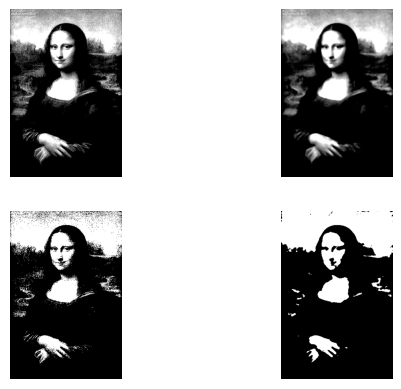

In [7]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(img1, cmap='gray')
axes[0, 0].axis('off')

axes[0, 1].imshow(blur, cmap='gray')
axes[0, 1].axis('off')

axes[1, 0].imshow(thresh, cmap='gray')
axes[1, 0].axis('off')

axes[1, 1].imshow(blurred_thresh, cmap='gray')
axes[1, 1].axis('off')
# Displaying the plot
plt.show()

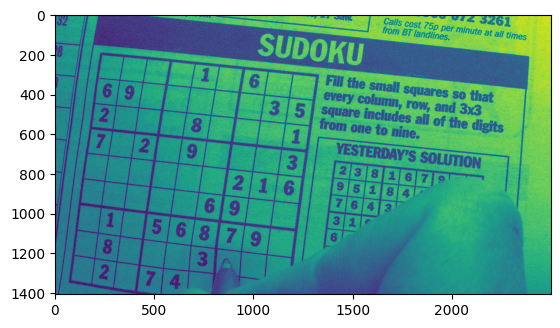

In [8]:
newspaper = cv2.imread(r'C:\Users\user\Downloads\newspaper2.jpg',0)
plt.imshow(newspaper)

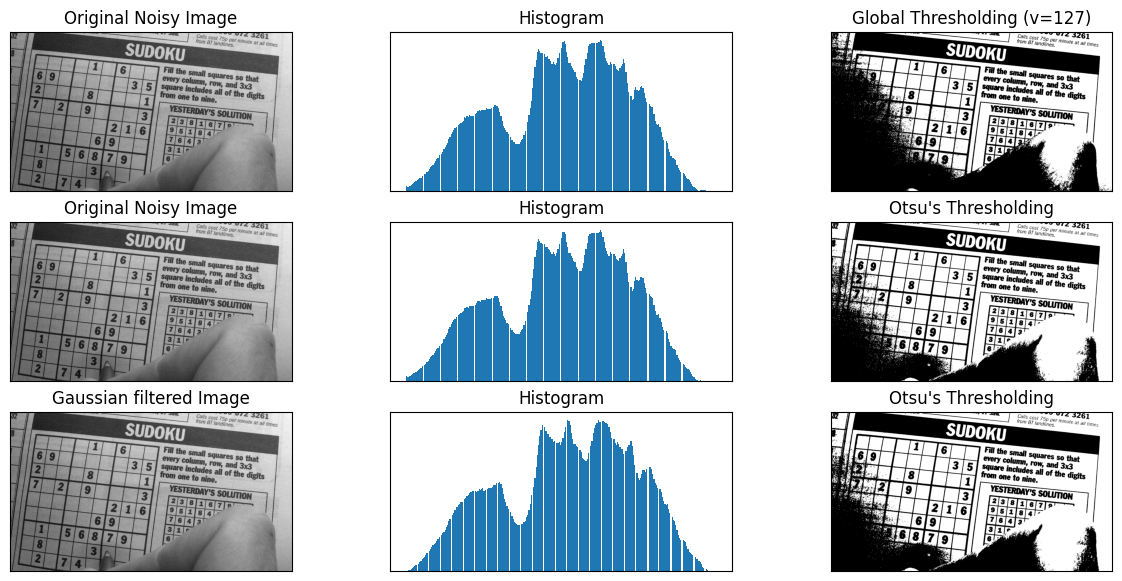

In [9]:
ret1,th1 = cv2.threshold(newspaper,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(newspaper,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(newspaper,(3,3),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [newspaper, 0, th1,
          newspaper, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=[15,7])
for i in range(3):
    #first column
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray'),
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    #second column
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    #third column
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

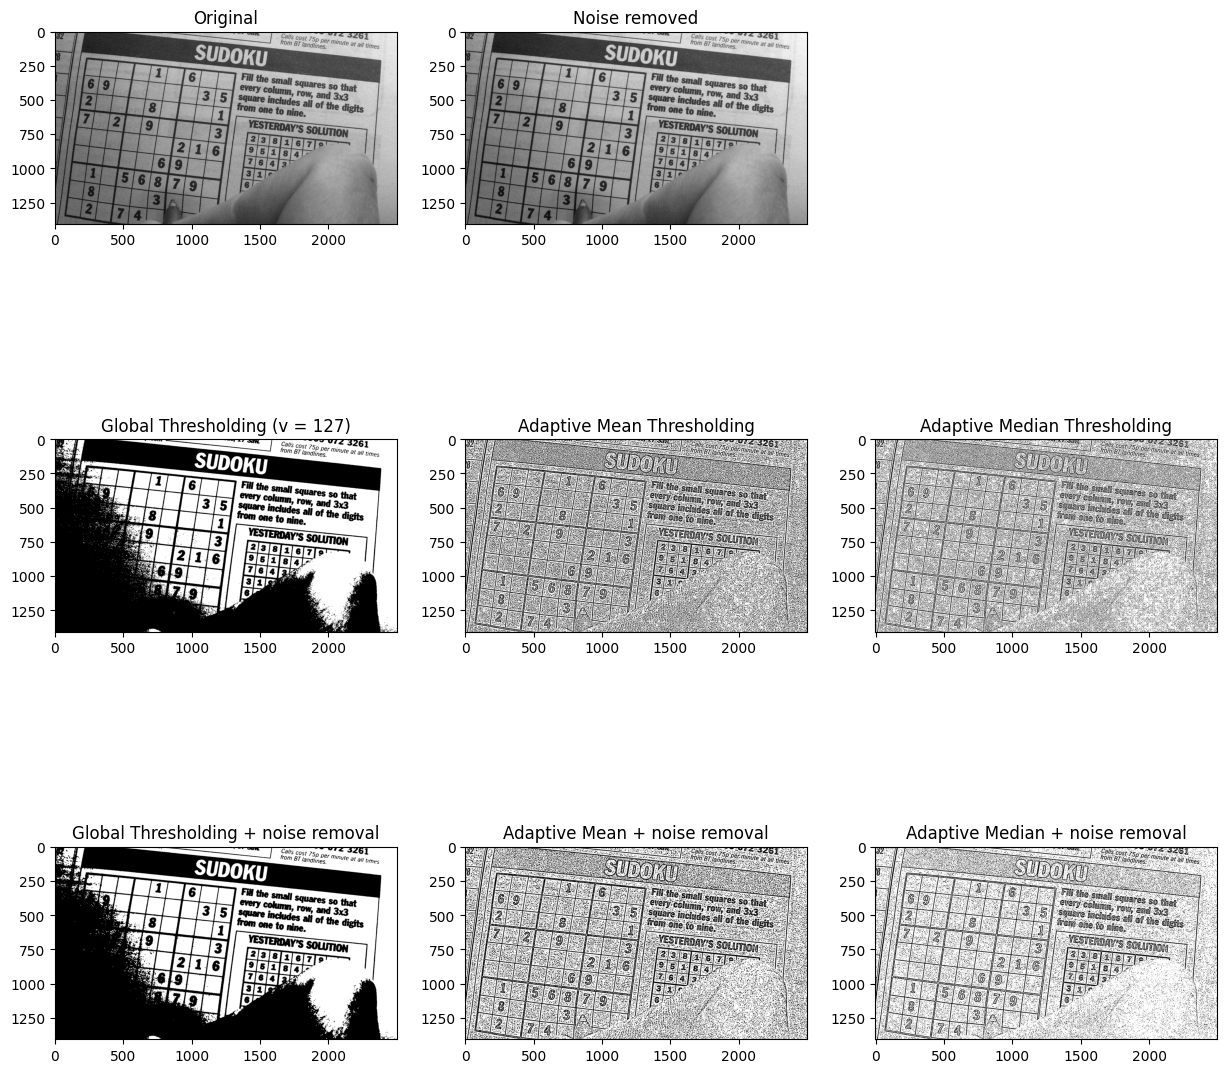

In [10]:
#Noise removal
noise_removed_image = cv2.medianBlur(newspaper,5)# or cv2.GaussianBlur(original_image,(5,5),0)

_,output1 = cv2.threshold(newspaper,127,255,cv2.THRESH_BINARY)
output2 = cv2.adaptiveThreshold(newspaper,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
output3 = cv2.adaptiveThreshold(newspaper,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

_,output4 = cv2.threshold(noise_removed_image,127,255,cv2.THRESH_BINARY)
output5 = cv2.adaptiveThreshold(noise_removed_image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
output6 = cv2.adaptiveThreshold(noise_removed_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)


plt.figure(figsize=[15,15])
plt.subplot(331);plt.imshow(newspaper, cmap='gray');plt.title("Original");
plt.subplot(332);plt.imshow(noise_removed_image, cmap='gray');plt.title("Noise removed");

plt.subplot(334);plt.imshow(output1, cmap='gray');plt.title("Global Thresholding (v = 127)");
plt.subplot(335);plt.imshow(output2, cmap='gray');plt.title("Adaptive Mean Thresholding");
plt.subplot(336);plt.imshow(output3, cmap='gray');plt.title("Adaptive Median Thresholding");

plt.subplot(337);plt.imshow(output4, cmap='gray');plt.title("Global Thresholding + noise removal");
plt.subplot(338);plt.imshow(output5, cmap='gray');plt.title("Adaptive Mean + noise removal");
plt.subplot(339);plt.imshow(output6, cmap='gray');plt.title("Adaptive Median + noise removal");

Drawing Contours And Pre-Processing RGB Pictures

In [11]:
ship = cv2.imread (r'C:\Users\user\Downloads\ships.jpg')

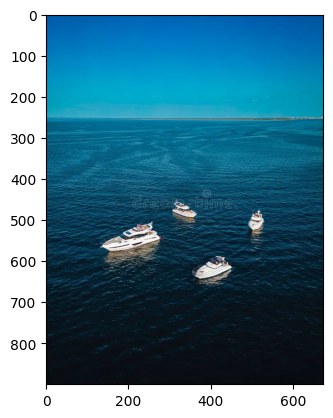

In [12]:
ship_rgb = cv2.cvtColor(ship,cv2.COLOR_BGR2RGB)
plt.imshow(ship_rgb)

In [13]:
binary_ship = cv2.cvtColor(ship,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(binary_ship,127,255,0)
contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
all_contours = cv2.drawContours(ship_rgb.copy(),contours,-1,(0,255,0),5)

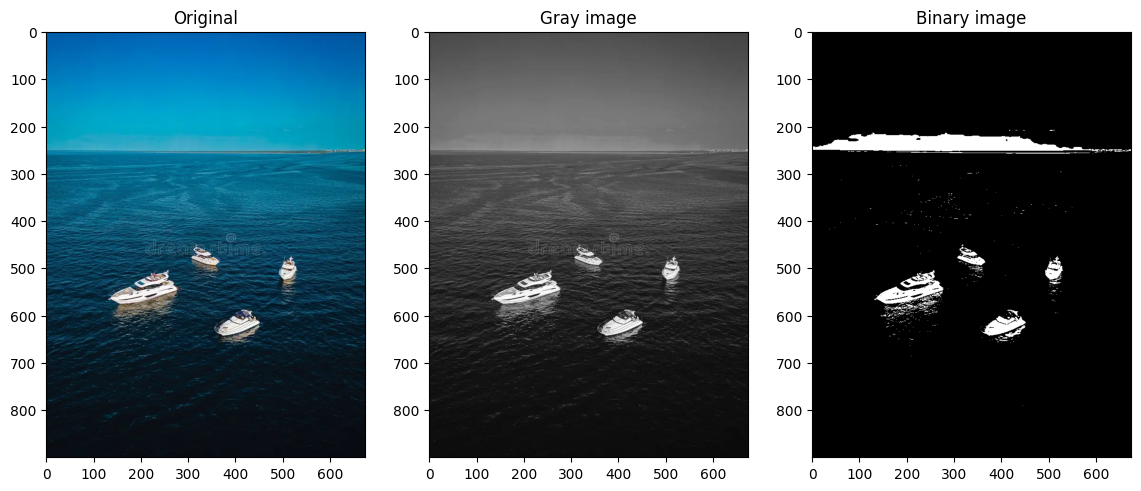

In [14]:
plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(ship[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(binary_ship, cmap='gray');plt.title("Gray image");
plt.subplot(133);plt.imshow(thresh, cmap='gray');plt.title("Binary image");

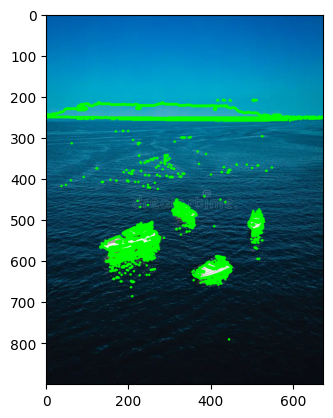

In [15]:
plt.imshow(all_contours)

In [16]:
binary_ship_blurred=cv2.medianBlur(thresh,5)
kernel2 = np.ones((5,5))
erode = cv2.erode(thresh,kernel2,iterations=1)
dilate = cv2.dilate(erode,kernel2,iterations=2)
_,thresh2 = cv2.threshold(dilate,127,255,0)
contours2,_ = cv2.findContours(thresh2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
all_contours2 = cv2.drawContours(ship.copy(),contours2,-1,(0,255,0),2)

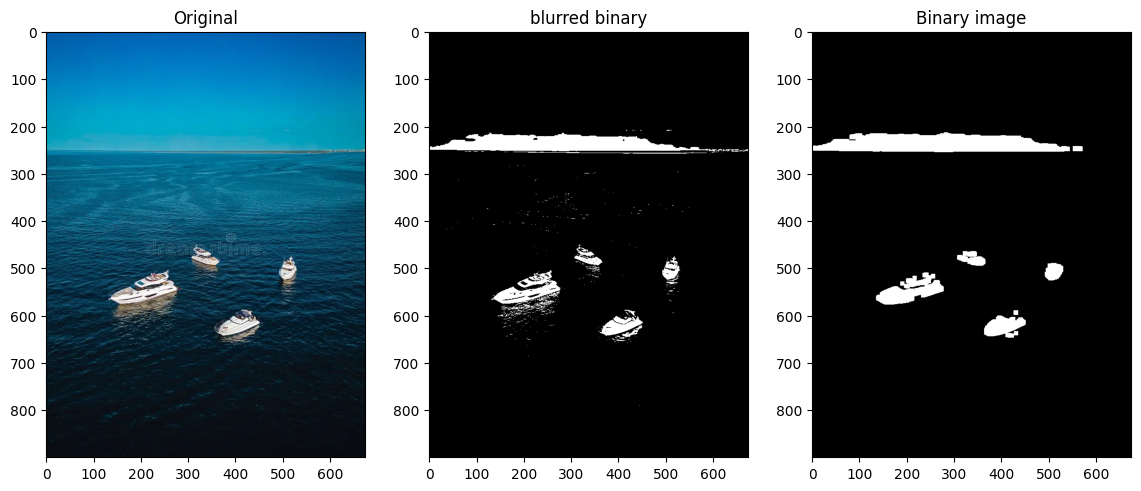

In [17]:
plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(ship[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(thresh, cmap='gray');plt.title("blurred binary");
plt.subplot(133);plt.imshow(thresh2, cmap='gray');plt.title("Binary image");

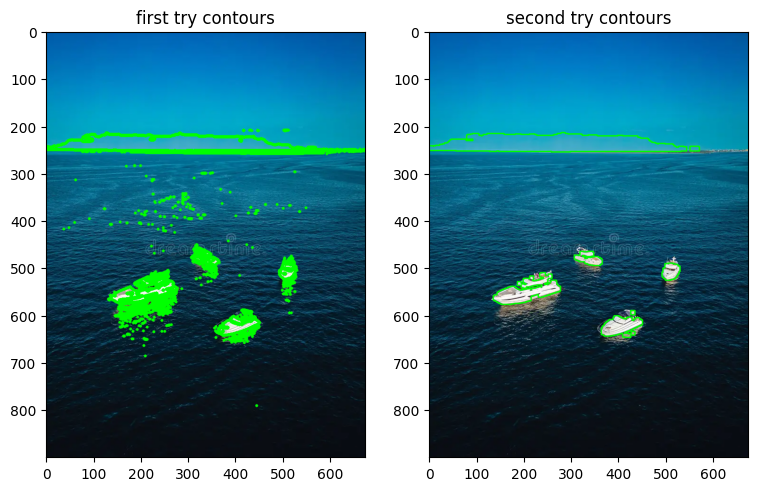

In [18]:
plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(all_contours[...,::1]);plt.title("first try contours");
plt.subplot(132);plt.imshow(all_contours2[...,::-1]);plt.title("second try contours");

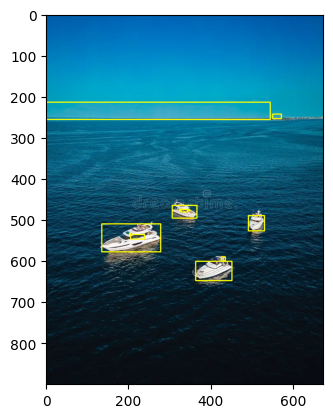

In [19]:
drawing = ship.copy()

for contour in contours2:
    boundRect = cv2.boundingRect(contour)
    cv2.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
                  (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (0,255,255), 2)

plt.imshow(drawing[...,::-1])

Color Filtering

Text(0.5, 1.0, 'mask')

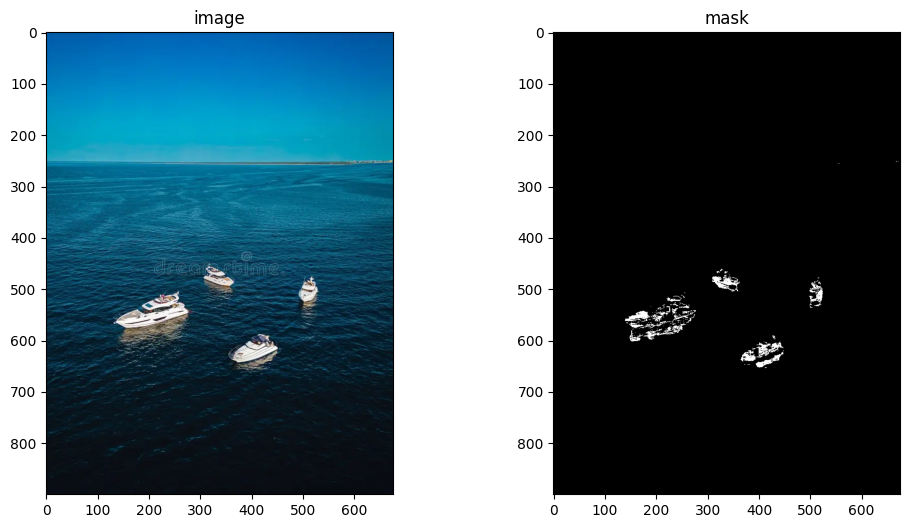

In [23]:
lower_white = np.array([0,0,0])
upper_white = np.array([30,50,250])
hsv_ship = cv2.cvtColor(ship,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_ship,lower_white,upper_white)
plt.figure(figsize=[12,6])
plt.subplot(121);plt.imshow(ship[...,::-1]);plt.title("image")
plt.subplot(122);plt.imshow(mask,cmap='gray');plt.title("mask")

Further Picture Manipulation

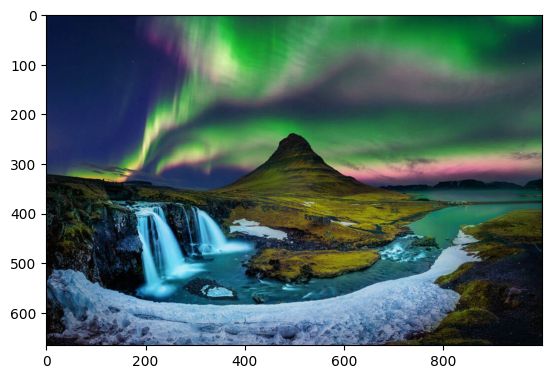

In [24]:
scenery = cv2.imread(r'C:\Users\user\Downloads\scenery.jpg')
plt.imshow(scenery[...,::-1])

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global img
    if event == cv2.EVENT_LBUTTONDOWN:
        bgr = img[x:x+1,y:y+1,:]
        print("BGR: ", bgr)
        hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
        print("HSV: ", hsv)
        cv2.circle(img,(x,y),5,(0,255,0),+2)

# Create a black image, a window and bind the function to window
img = cv2.imread(r'C:\Users\user\Downloads\scenery.jpg')

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

BGR:  [[[72 35 15]]]
HSV:  [[[109 202  72]]]


In [27]:
def pop_efect(image, lower, upper):
    img = image.copy()
    #convert the BGR image to HSV colour space
    hsv = cv2.cvtColor(scenery, cv2.COLOR_BGR2HSV)
    #obtain the grayscale image of the original image
    gray = cv2.cvtColor(scenery, cv2.COLOR_BGR2GRAY)
    #create a mask using the bounds set
    mask = cv2.inRange(hsv, lower, upper)
    #create an inverse of the mask
    mask_inv = cv2.bitwise_not(mask)
    #Take only region of image from the mask
    res = cv2.bitwise_and(img, img, mask=mask)
    #Filter the regions containing colors other than masked region from the grayscale image
    background = cv2.bitwise_and(gray, gray, mask = mask_inv)
    #convert the one channelled grayscale background to a three channelled image
    background = cv2.merge([background]*3)
    #add the color region to gray image
    return cv2.add(res, background)

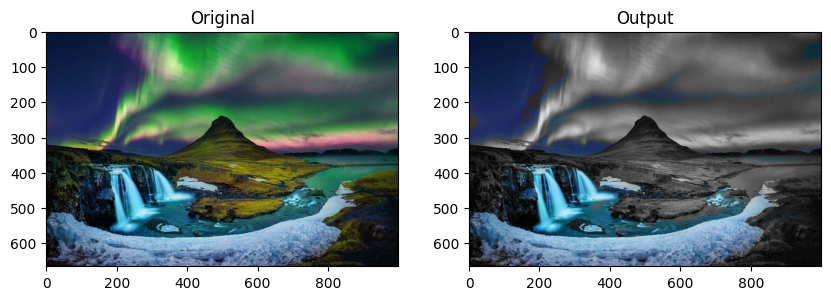

In [36]:
def apply_pop_efect(event,x,y,flags,param, crange=10):
    global image, new_image
    if event == cv2.EVENT_LBUTTONDOWN:
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = hsv[x,y,:]
        lower_h = max(0, h-crange)
        upper_h = min(179, h+crange)
        #set the bounds for the red hue
        lower = np.array([lower_h,50,50])
        upper = np.array([upper_h,255,255])
        new_image = pop_efect(image, lower, upper)
        cv2.imshow("result", new_image)
        
        
# Create a black image, a window and bind the function to window
image = cv2.imread(r"C:\Users\user\Downloads\scenery.jpg")
new_image = image.copy()

cv2.namedWindow('image')
cv2.setMouseCallback('image',apply_pop_efect)

while True:
    cv2.imshow('image',image)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
            
plt.figure(figsize=[10,15])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(new_image[...,::-1]);plt.title("Output");

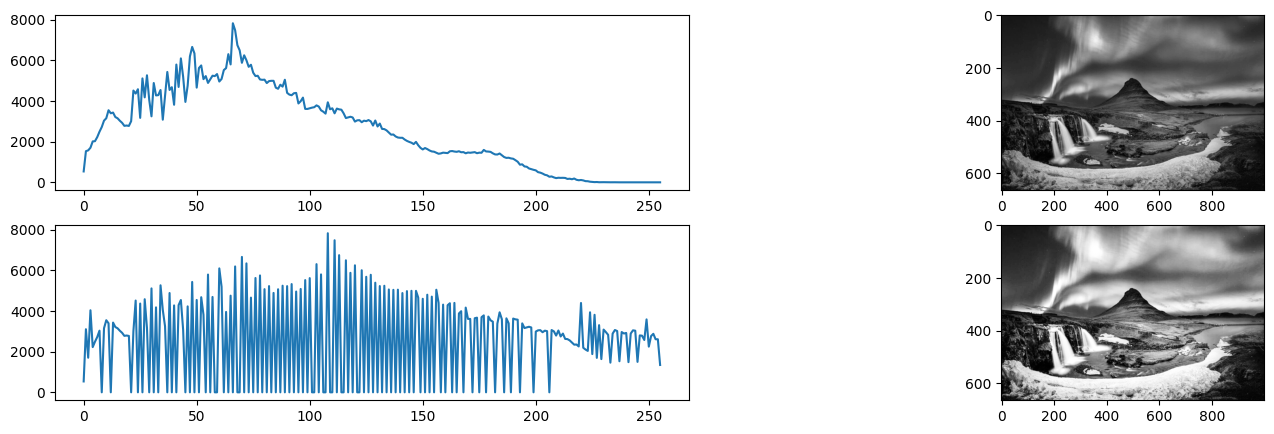

In [37]:
gray_scenery = cv2.cvtColor(scenery, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_scenery], [0], None, [256], [0, 256])
equalized_scenery = cv2.equalizeHist(gray_scenery)
equalized_hist = cv2.calcHist([equalized_scenery], [0], None, [256], [0, 256])
plt.figure(figsize=[18,5])
plt.subplot(221);plt.plot(hist)
plt.subplot(222);plt.imshow(gray_scenery,cmap='gray')
plt.subplot(223);plt.plot(equalized_hist)
plt.subplot(224);plt.imshow(equalized_scenery,cmap='gray')


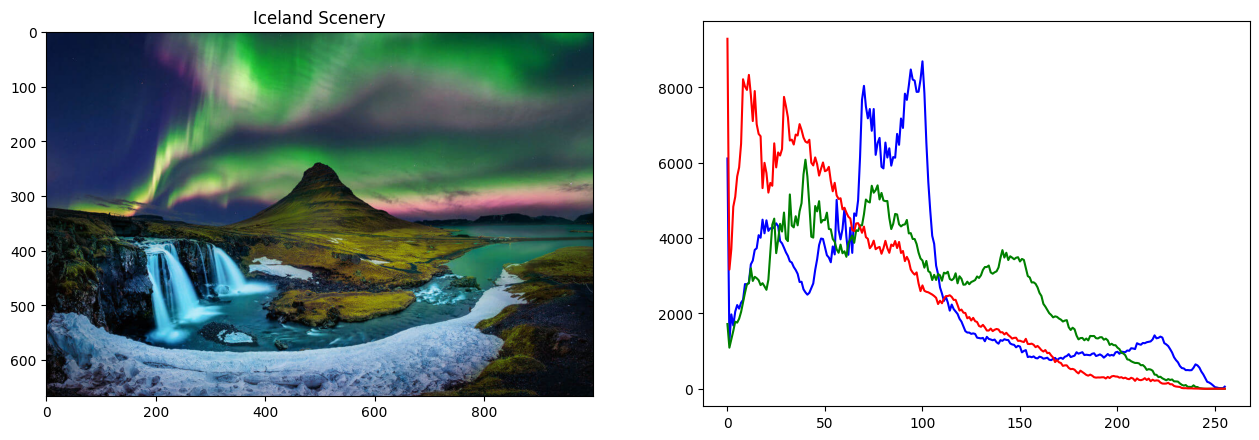

In [38]:
plt.figure(figsize=[24,5])
color = ('b', 'g', 'r')
#dark tones histogram
plt.subplot(131);plt.imshow(scenery[...,::-1]);plt.title("Iceland Scenery");
plt.subplot(132);
for i, col in enumerate(color):
    histogram = cv2.calcHist([scenery], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)


Edge Detection

Text(0.5, 1.0, 'Goat')

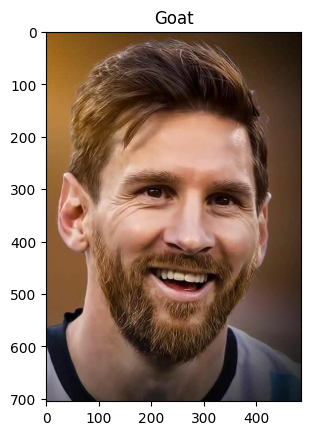

In [40]:
messi = cv2.imread(r'C:\Users\user\Downloads\messi.jpg')
plt.imshow(messi[...,::-1]);plt.title('Goat')

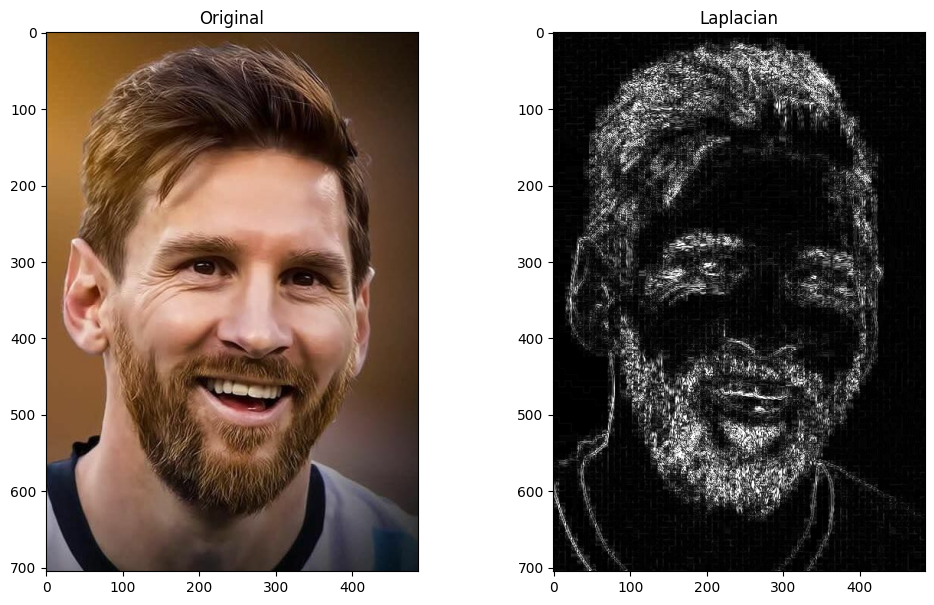

In [41]:
messi_gray = cv2.cvtColor(messi,cv2.COLOR_BGR2GRAY)
laplacian_edge = cv2.Laplacian(messi_gray,cv2.CV_16S,ksize=3)
abs_laplacian = cv2.convertScaleAbs(laplacian_edge)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(messi[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(abs_laplacian, cmap='gray');plt.title("Laplacian");

Text(0.5, 1.0, 'Edge Image')

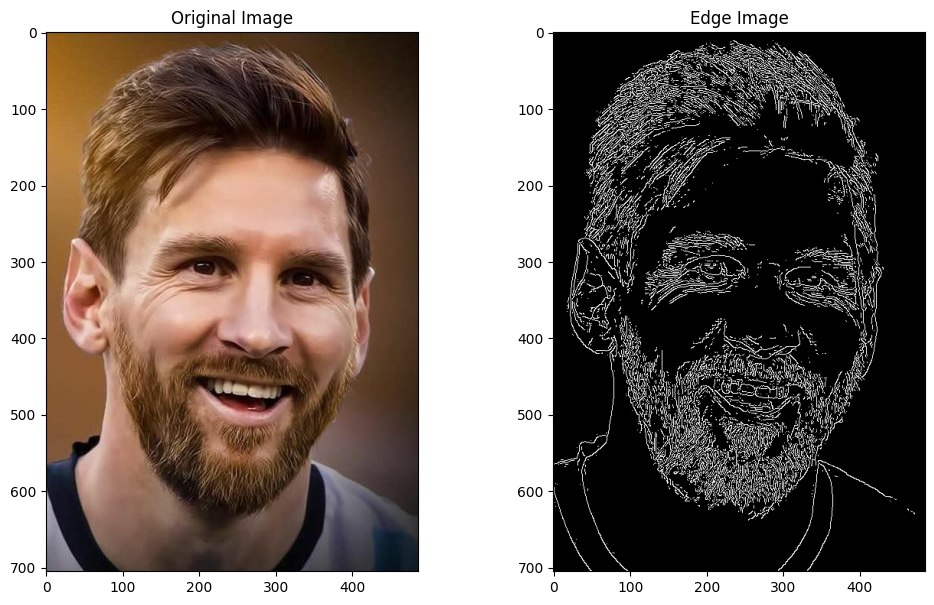

In [42]:
edges = cv2.Canny(messi,100,100)
plt.figure(figsize=[12,7])
plt.subplot(121),plt.imshow(messi[...,::-1]);plt.title('Original Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray');plt.title('Edge Image')

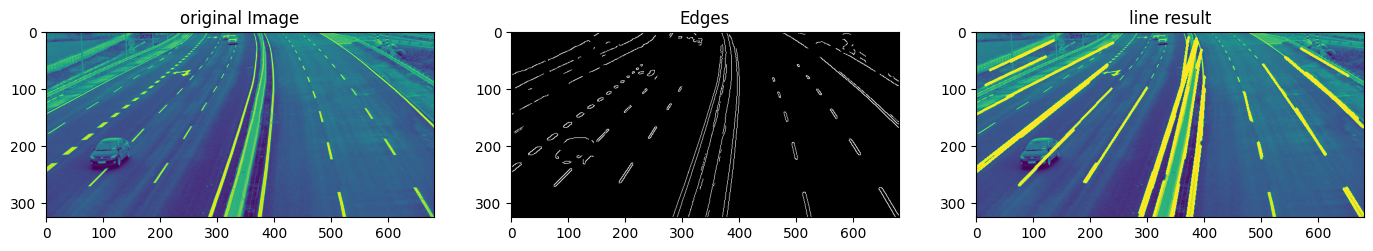

In [51]:
highway = cv2.imread(r'C:\Users\user\Downloads\highway2.jpg',0)
news_blured = cv2.medianBlur(highway, 5)
# Convert the image to gray-scale
news_edges = cv2.Canny(news_blured, 200, 300)
news_copy=highway.copy()
lines = cv2.HoughLinesP(news_edges, 1, np.pi/180, 50, minLineLength=20, maxLineGap=50)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(news_copy, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.figure(figsize=[17,8])
plt.subplot(131);plt.imshow(highway[...,::1]);plt.title("original Image");
plt.subplot(132);plt.imshow(news_edges, cmap='gray');plt.title("Edges");
plt.subplot(133);plt.imshow(news_copy);plt.title("line result");